# Task1_Exploratory_Data_Analysis

1. Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

1. Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

1. Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

1. Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

1. For a challenge – what insights can you draw from the location information provided in the dataset?

1. Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [3]:
df.shape

(12043, 23)

In [4]:
df.duplicated().sum()

0

In [37]:
max(df['date']) - min(df['date'])

Timedelta('91 days 00:00:00')

In [5]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [7]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [8]:
df.bpay_biller_code[~df.bpay_biller_code.isnull()][0:10]
# bpay_biller_code column has more null values and remaining are zero

50    0
61    0
64    0
68    0
70    0
72    0
90    0
92    0
93    0
97    0
Name: bpay_biller_code, dtype: object

In [9]:
df = df.drop(["bpay_biller_code", "currency", "first_name", "transaction_id", "country"], axis=1)

df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,merchant_code,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit


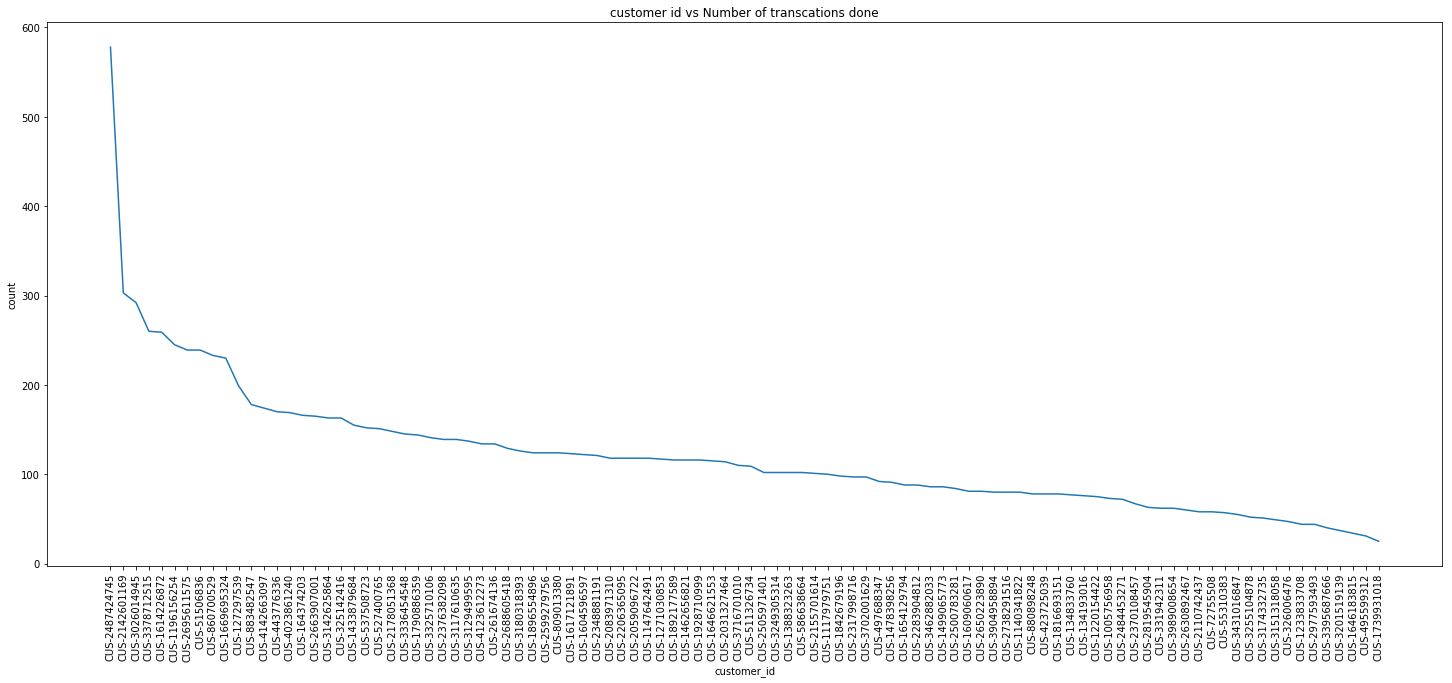

In [10]:
fn = df['customer_id'].value_counts()
fig, ax= plt.subplots(figsize=(25,10))
ax.plot(fn)
ax.set_title('customer id vs Number of transcations done')
ax.set_xticklabels(fn.index, rotation=90)
ax.set_xlabel('customer_id')
ax.set_ylabel('count')
plt.show()
plt.savefig('customer id vs Number of transcations done.png')

In [11]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [12]:
df['year'] = [i.year for i in df['date']]
df['month'] = [i.month for i in df['date']]
df['day'] = [i.day_name() for i in df['date']]

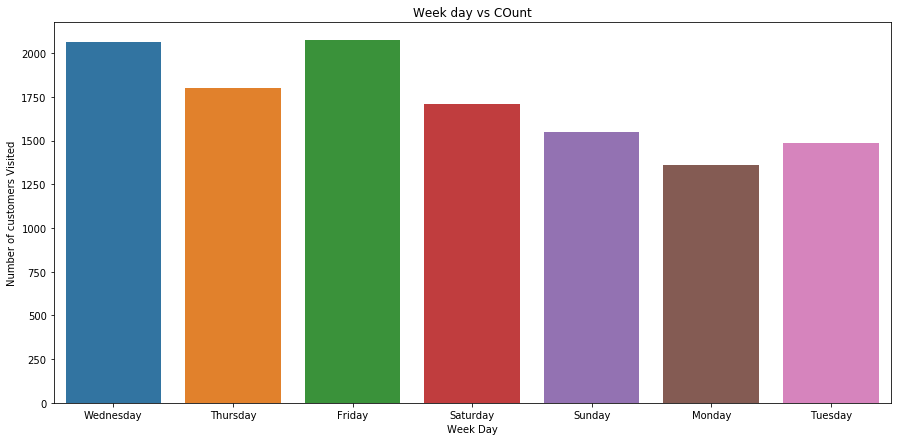

In [13]:
day_count = df['day'].value_counts()
plt.figure(figsize=(15,7))
sns.countplot(df['day'])
plt.xlabel('Week Day')
plt.ylabel('Number of customers Visited')
plt.title('Week day vs Count')
plt.show()
plt.savefig('Week day vs Count.png')

In [14]:
df['day'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: day, dtype: int64

In [15]:
df[['year','month','day']].head()

,year,month,day
0,2018,8,Wednesday
1,2018,8,Wednesday
2,2018,8,Wednesday
3,2018,8,Wednesday
4,2018,8,Wednesday


In [16]:
df.groupby(['month', 'year','day']).mean().reset_index()

,month,year,day,card_present_flag,merchant_code,balance,age,amount
0,8,2018,Friday,0.823183,0.0,9555.436743,30.503169,230.226705
1,8,2018,Monday,0.821429,0.0,12820.582798,30.632603,374.982774
2,8,2018,Saturday,0.807980,NaN,9755.858953,30.563953,50.795000
3,8,2018,Sunday,0.775316,NaN,11066.446185,29.571106,40.342054
4,8,2018,Thursday,0.821333,0.0,13372.155621,31.713087,178.239430
5,8,2018,Tuesday,0.812274,0.0,10986.983564,30.595388,217.958952
6,8,2018,Wednesday,0.775982,0.0,9290.821519,29.776371,196.750858
7,9,2018,Friday,0.783981,0.0,14471.007666,30.704791,245.075703
8,9,2018,Monday,0.773333,0.0,14740.961529,29.680000,359.325506
9,9,2018,Saturday,0.777143,NaN,16535.612980,30.429652,58.732345


In [17]:
df.describe(include='all')

,status,card_present_flag,account,long_lat,txn_description,merchant_id,merchant_code,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,year,month,day
count,12043,7717.000000,12043,12043,12043,7717,883.0,12043.000000,12043,12043,...,7717,7717,12043,12043.000000,12043,7717,12043,12043.0,12043.000000,12043
unique,2,NaN,100,100,6,5725,NaN,NaN,91,2,...,1609,8,9442,NaN,100,2703,2,NaN,NaN,7
top,authorized,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,NaN,2018-09-28 00:00:00,M,...,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,CUS-2487424745,151.21 -33.87,debit,NaN,NaN,Friday
freq,7717,NaN,578,578,3934,14,NaN,NaN,174,6285,...,255,2169,10,NaN,578,145,11160,NaN,NaN,2073
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,0.0,14704.195553,NaN,NaN,...,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,2018.0,9.011957,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,0.0,31503.722652,NaN,NaN,...,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,0.0,0.816511,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,0.240000,NaN,NaN,...,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,2018.0,8.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,0.0,3158.585000,NaN,NaN,...,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,2018.0,8.000000,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
account              12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
customer_id          12043 non-null object
merchant_long_lat    7717 non-null object
movement             12043 non-null object
year                 12043 non-null int64
month                12043 non-null int64
day                  12043 no

In [19]:
df.shape


(12043, 21)

In [20]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

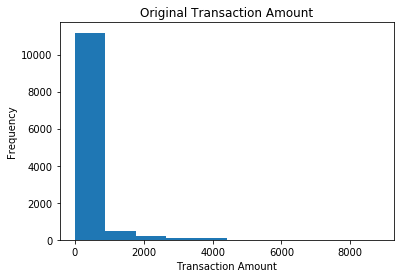

In [21]:
plt.hist(df['amount'])
plt.xlabel('Average trainsaction')
plt.title('Original Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

card_present_flag       0.000
merchant_code           0.000
balance              9307.360
age                    16.000
amount                 37.655
year                    0.000
month                   2.000
dtype: float64


In [23]:
IQR.index

Index(['card_present_flag', 'merchant_code', 'balance', 'age', 'amount',
       'year', 'month'],
      dtype='object')

In [24]:
rdf = df[['card_present_flag', 'merchant_code', 'balance', 'age', 'amount', 'month', 'year', 'day']]
outliers_removed_data = rdf[~ ((rdf < (Q1 - 1.5 * IQR)) \
                                     | (rdf > (Q3 + 1.5 * IQR))).any(axis=1)]

outliers_removed_data.shape

(7730, 8)

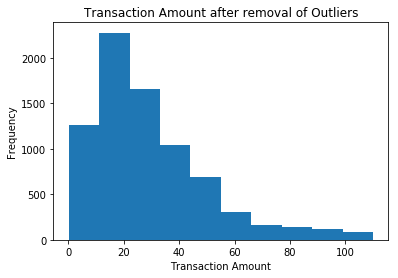

In [26]:
plt.hist(outliers_removed_data['amount'])
plt.title('Transaction Amount after removal of Outliers')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

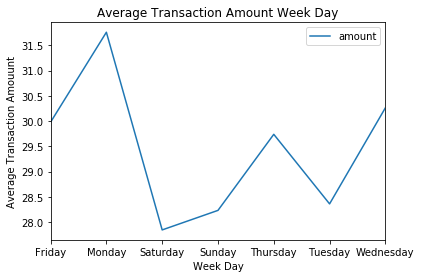

In [35]:
outliers_removed_data.groupby(['day']).mean().reset_index().plot(kind = 'line',x = 'day', y = 'amount' )
plt.title('Average Transaction Amount Week Day')
plt.xlabel('Week Day')
plt.ylabel('Average Transaction Amouunt')
plt.show()
plt.savefig('Average Transaction Amount Week Day.png')

In [27]:
customer_locations = [loc.split() for loc in df['long_lat'].unique()]
customer_id = df['customer_id']
customer_locations[0], customer_id[0]

(['153.41', '-27.95'], 'CUS-2487424745')

In [33]:
import folium
map_result = folium.Map(location=['-27.95', '153.41'], tiles='Stamen Terrain', zoom_start = 12)

for loc in range(len(customer_locations)):
    customer_locations[loc].reverse()
    folium.Marker(customer_locations[loc], popup = customer_id[loc]).add_to(map_result)
    
map_result

In [34]:
map_result.save('Module1_Customer_Locations.html')